In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS & SCRIPTS\BITCOIN VALUE TIME SERIES PROJECT')

In [5]:
df=pd.read_csv('coin_Bitcoin.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [7]:
df1=df.reset_index()['Close']
df1

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548402
2988    35287.779766
2989    33746.002456
2990    34235.193451
Name: Close, Length: 2991, dtype: float64

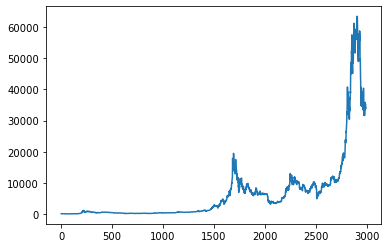

In [8]:
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc=MinMaxScaler(feature_range=(0,1))
df1=sc.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.00119979],
       [0.00111246],
       [0.00076549],
       ...,
       [0.5552035 ],
       [0.53089867],
       [0.53861036]])

In [12]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [13]:
len(train_data)

2243

In [14]:
len(test_data)

748

In [15]:
def create_dataset(dataset,time_step):
    x,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)

In [16]:
xtrain,ytrain=create_dataset(train_data,150)

In [17]:
xtrain.shape

(2092, 150)

In [18]:
ytrain.shape

(2092,)

In [19]:
xtest,ytest=create_dataset(test_data,150)

In [20]:
xtest.shape

(597, 150)

In [21]:
ytest.shape

(597,)

In [22]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [23]:
print(xtrain.shape,xtest.shape)

(2092, 150, 1) (597, 150, 1)


In [24]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=100,verbose=1)

Epoch 1/100
21/21 [==============================] - 27s 845ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 2/100
21/21 [==============================] - 15s 704ms/step - loss: 2.6114e-04 - val_loss: 0.0130
Epoch 3/100
21/21 [==============================] - 14s 672ms/step - loss: 1.9216e-04 - val_loss: 0.0099
Epoch 4/100
21/21 [==============================] - 14s 673ms/step - loss: 1.6854e-04 - val_loss: 0.0131
Epoch 5/100
21/21 [==============================] - 14s 652ms/step - loss: 1.4489e-04 - val_loss: 0.0146
Epoch 6/100
21/21 [==============================] - 16s 784ms/step - loss: 1.3919e-04 - val_loss: 0.0124
Epoch 7/100
21/21 [==============================] - 13s 618ms/step - loss: 1.2009e-04 - val_loss: 0.0198
Epoch 8/100
21/21 [==============================] - 13s 643ms/step - loss: 1.2738e-04 - val_loss: 0.0198
Epoch 9/100
21/21 [==============================] - 14s 681ms/step - loss: 1.2788e-04 - val_loss: 0.0197
Epoch 10/100
21/21 [==============================

Epoch 78/100
21/21 [==============================] - 12s 552ms/step - loss: 3.4277e-05 - val_loss: 0.0030
Epoch 79/100
21/21 [==============================] - 11s 545ms/step - loss: 4.2604e-05 - val_loss: 0.0036
Epoch 80/100
21/21 [==============================] - 12s 580ms/step - loss: 3.9263e-05 - val_loss: 0.0059
Epoch 81/100
21/21 [==============================] - 13s 601ms/step - loss: 3.2539e-05 - val_loss: 0.0032
Epoch 82/100
21/21 [==============================] - 12s 598ms/step - loss: 3.3270e-05 - val_loss: 0.0043
Epoch 83/100
21/21 [==============================] - 12s 571ms/step - loss: 3.2878e-05 - val_loss: 0.0035
Epoch 84/100
21/21 [==============================] - 13s 600ms/step - loss: 3.1944e-05 - val_loss: 0.0043
Epoch 85/100
21/21 [==============================] - 12s 596ms/step - loss: 3.5098e-05 - val_loss: 0.0031
Epoch 86/100
21/21 [==============================] - 12s 597ms/step - loss: 3.2458e-05 - val_loss: 0.0046
Epoch 87/100
21/21 [=================

In [29]:
train_predict=model.predict(xtrain)
test_predict=model.predict(xtest)

In [30]:
train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
np.sqrt(mean_squared_error(ytrain,train_predict))

4437.863378222285

In [33]:
np.sqrt(mean_squared_error(ytest,test_predict))

24658.209221929683

In [34]:
look_back=150
trainpredictplot=np.empty_like(df1)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict

testpredictplot=np.empty_like(df1)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict


In [35]:
trainpredictplot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

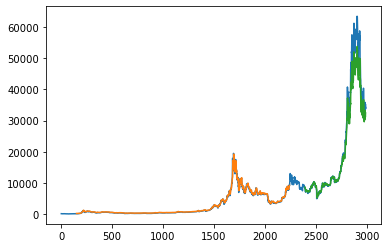

In [36]:
plt.plot(sc.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [37]:
len(test_data)

748

In [54]:
x_input=test_data[598:].reshape(1,-1)
x_input.shape

(1, 150)

In [55]:
x_input

array([[0.61220137, 0.72716975, 0.73165687, 0.70701875, 0.75417167,
        0.74779538, 0.74150022, 0.76690847, 0.75473485, 0.77451595,
        0.82100661, 0.8136099 , 0.8799508 , 0.88328314, 0.9059902 ,
        0.85345417, 0.76859739, 0.78248414, 0.74131634, 0.7294287 ,
        0.72704344, 0.71048034, 0.78131614, 0.76157542, 0.79561427,
        0.7644473 , 0.77021917, 0.76998392, 0.80615181, 0.82254385,
        0.86317748, 0.88184905, 0.91017053, 0.90271354, 0.96436711,
        0.93377254, 0.88025137, 0.89440287, 0.9269715 , 0.9110186 ,
        0.91870729, 0.91818691, 0.90572973, 0.85852749, 0.8618348 ,
        0.83086325, 0.81399399, 0.86811475, 0.8812967 , 0.88093783,
        0.90930471, 0.92770926, 0.92772723, 0.93051709, 0.93506514,
        0.90699825, 0.9252006 , 0.92991918, 0.91627497, 0.88248574,
        0.91834946, 0.91710487, 0.94151145, 0.94800202, 0.94309128,
        1.        , 0.99379267, 0.99701353, 0.96956463, 0.95555079,
        0.88512225, 0.87736758, 0.88917124, 0.84

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
temp_input

[0.6122013713739329,
 0.7271697507162774,
 0.7316568697464649,
 0.7070187507187238,
 0.7541716699756232,
 0.7477953818089361,
 0.7415002207589072,
 0.7669084662751825,
 0.7547348546897903,
 0.7745159531144207,
 0.8210066119027296,
 0.8136098964903667,
 0.8799507997950198,
 0.8832831359111819,
 0.9059901989348902,
 0.8534541669706456,
 0.76859738583862,
 0.7824841372109501,
 0.7413163404337236,
 0.7294286977110844,
 0.7270434412554367,
 0.7104803394774203,
 0.7813161398255112,
 0.7615754164899116,
 0.7956142663901087,
 0.7644473014463062,
 0.7702191662758353,
 0.7699839204666649,
 0.8061518127737974,
 0.8225438505356846,
 0.8631774819244867,
 0.8818490526177396,
 0.9101705290170514,
 0.9027135438430914,
 0.9643671127128419,
 0.9337725361514047,
 0.8802513678707756,
 0.8944028713674868,
 0.9269715042129597,
 0.9110186044200775,
 0.918707294595221,
 0.9181869138747053,
 0.9057297327229326,
 0.8585274925639796,
 0.8618348028845076,
 0.8308632508114777,
 0.8139939939186963,
 0.8681147528543

In [58]:
len(temp_input)

150

In [59]:
lst_output=[]
n_steps=150
i=0
while (i<31):
    if (len(temp_input)>150):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print('{} day input {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.49671978]
151
1 day input [[0.46434504]]
2 day input [[0.43606234]]
3 day input [[0.41267085]]
4 day input [[0.39500666]]
5 day input [[0.38260183]]
6 day input [[0.37428936]]
7 day input [[0.36869657]]
8 day input [[0.36452568]]
9 day input [[0.36071354]]
10 day input [[0.35650355]]
11 day input [[0.35145727]]
12 day input [[0.34542632]]
13 day input [[0.3384944]]
14 day input [[0.33090323]]
15 day input [[0.3229739]]
16 day input [[0.31503633]]
17 day input [[0.30737567]]
18 day input [[0.300199]]
19 day input [[0.293625]]
20 day input [[0.28768837]]
21 day input [[0.28235745]]
22 day input [[0.27755573]]
23 day input [[0.27318394]]
24 day input [[0.2691389]]
25 day input [[0.26532766]]
26 day input [[0.2616766]]
27 day input [[0.2581346]]
28 day input [[0.25467312]]
29 day input [[0.25128305]]
30 day input [[0.2479699]]


In [60]:
day_new=np.arange(1,151)
day_pred=np.arange(151,182)

In [61]:
len(df1)

2991

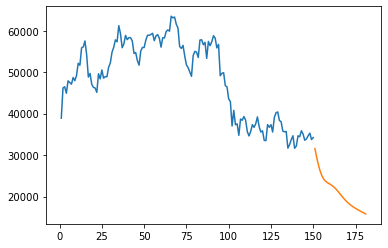

In [62]:
plt.plot(day_new,sc.inverse_transform(df1[2841:]))
plt.plot(day_pred,sc.inverse_transform(lst_output))

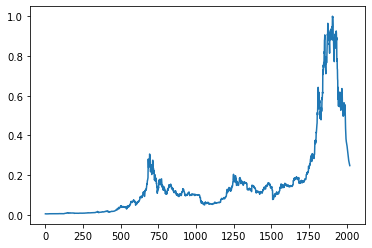

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])